In [196]:
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt

%matplotlib inline

In [197]:
ds = xr.open_dataset(r"C:\Users\ioloi\Downloads/ERSST_V5_mon_185401-202106.nc")
# select period
ds = ds.sel(time=slice('1990', '2020'))

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 372, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-07-07

In [198]:
ds_EP = ds.sel(lat=slice(5, -5), lon=slice(190, 240))
ds_EP_mean = ds_EP.mean(dim=('lon', 'lat'))
ds_EP_mean


<xarray.Dataset>
Dimensions:    (time: 372, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time) float32 26.56 26.98 27.34 27.9 ... 25.89 25.46 25.28 25.45

In [199]:
month=ds_EP_mean['time.month']
year=ds_EP_mean['time.year']
yyyymm=year*100+month
yyyymm

<xarray.DataArray (time: 372)>
array([199001, 199002, 199003, 199004, 199005, 199006, 199007, 199008,
       199009, 199010, 199011, 199012, 199101, 199102, 199103, 199104,
       199105, 199106, 199107, 199108, 199109, 199110, 199111, 199112,
       199201, 199202, 199203, 199204, 199205, 199206, 199207, 199208,
       199209, 199210, 199211, 199212, 199301, 199302, 199303, 199304,
       199305, 199306, 199307, 199308, 199309, 199310, 199311, 199312,
       199401, 199402, 199403, 199404, 199405, 199406, 199407, 199408,
       199409, 199410, 199411, 199412, 199501, 199502, 199503, 199504,
       199505, 199506, 199507, 199508, 199509, 199510, 199511, 199512,
       199601, 199602, 199603, 199604, 199605, 199606, 199607, 199608,
       199609, 199610, 199611, 199612, 199701, 199702, 199703, 199704,
       199705, 199706, 199707, 199708, 199709, 199710, 199711, 199712,
       199801, 199802, 199803, 199804, 199805, 199806, 199807, 199808,
       199809, 199810, 199811, 199812, 199901, 199902, 199903, 199904,
       199905, 199906, 199907, 199908, 199909, 199910, 199911, 199912,
       200001, 200002, 200003, 200004, 200005, 200006, 200007, 200008,
       200009, 200010, 200011, 200012, 200101, 200102, 200103, 200104,
       200105, 200106, 200107, 200108, 200109, 200110, 200111, 200112,
       200201, 200202, 200203, 200204, 200205, 200206, 200207, 200208,
       200209, 200210, 200211, 200212, 200301, 200302, 200303, 200304,
...
       200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
       201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
       201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
       201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
       202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
       202009, 202010, 202011, 202012], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01

In [200]:
df1 = pd.DataFrame(yyyymm, columns=['YYYYMM'])
df2 = pd.DataFrame(year, columns=['YYYY'])
df3 = pd.DataFrame(month, columns=['MM'])
df4 = pd.DataFrame(ds_EP_mean['sst'], columns=['sst'])

df = pd.concat([df1, df2,df3,df4], axis=1, join='inner')
display(df)

,YYYYMM,YYYY,MM,sst
0,199001,1990,1,26.563663
1,199002,1990,2,26.975691
2,199003,1990,3,27.338955
3,199004,1990,4,27.904119
4,199005,1990,5,28.018179
...,...,...,...,...
367,202008,2020,8,26.267385
368,202009,2020,9,25.886917
369,202010,2020,10,25.463387
370,202011,2020,11,25.284395


In [201]:
df['YYYYMM'] = pd.to_datetime(df1['YYYYMM'], format='%Y%m', errors='ignore')
df.set_index('YYYYMM', inplace=True)

In [202]:
df1 = df.groupby(['YYYY', 'MM'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,YYYY,MM,mean
0,1990,1,26.563663
1,1990,2,26.975691
2,1990,3,27.338955
3,1990,4,27.904119
4,1990,5,28.018179


In [203]:
heatmap_data = pd.pivot_table(df1, values='mean', index=['MM'], columns='YYYY')
print(heatmap_data.iloc[0:3, 0:3])

YYYY       1990       1991       1992
MM                                   
1     26.563663  27.038706  28.370167
2     26.975691  27.078781  28.525696
3     27.338955  27.331232  28.661287


C:\Users\ioloi\anaconda3\envs\CDA_1102_py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  


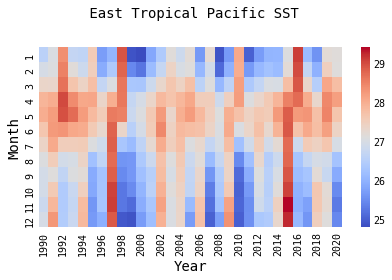

In [204]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Year", size=14)
plt.ylabel("Month", size=14)
plt.title(" East Tropical Pacific SST", size=14)
plt.tight_layout()
plt.savefig('heatmap_with_Seaborn_python.jpg',dpi=150, figsize=(9,6))